In [ ]:
# The Best Neighbourhood in Pittsburgh
The goal of this project is to determine which Pittsburgh neighborhood can be considered as the **best**.

# Metric
We decided that the best Neighbourhood in Pittsburgh would most likely be the one thats **safest**. 

# Criminal Activity

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("criminalactivity.csv")
df.head()


/scratch/slurm-22234/ipykernel_3313361/2129497667.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("criminalactivity.csv")


,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107.0,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


In [9]:
df.isnull().sum()
df = df.dropna(subset=['Neighborhood'])

df['ReportedDate'] = pd.to_datetime(df['ReportedDate'], errors='coerce')

df['Neighborhood'] = df['Neighborhood'].str.strip().str.title()

df.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919.0,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107.0,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


In [10]:

crime_by_neighborhood = df['Neighborhood'].value_counts().reset_index()
crime_by_neighborhood.columns = ['Neighborhood', 'Crime_Count']

crime_by_neighborhood = crime_by_neighborhood.sort_values(by='Crime_Count', ascending=True)

crime_by_neighborhood.head(10)



,Neighborhood,Crime_Count
90,Saint Clair,25
89,Ridgemont,32
88,Chartiers,38
87,New Homestead,51
86,Swisshelm Park,61
85,East Carnegie,75
84,Summer Hill,77
83,Esplen,79
82,Oakwood,84
81,Regent Square,95


In [11]:
safest = crime_by_neighborhood.iloc[0]

print("The safest neighborhood in Pittsburgh is:",
      safest['Neighborhood'],
      "with only",
      safest['Crime_Count'],
      "Crime recorded.")

The safest neighborhood in Pittsburgh is: Saint Clair with only 25 Crime recorded.


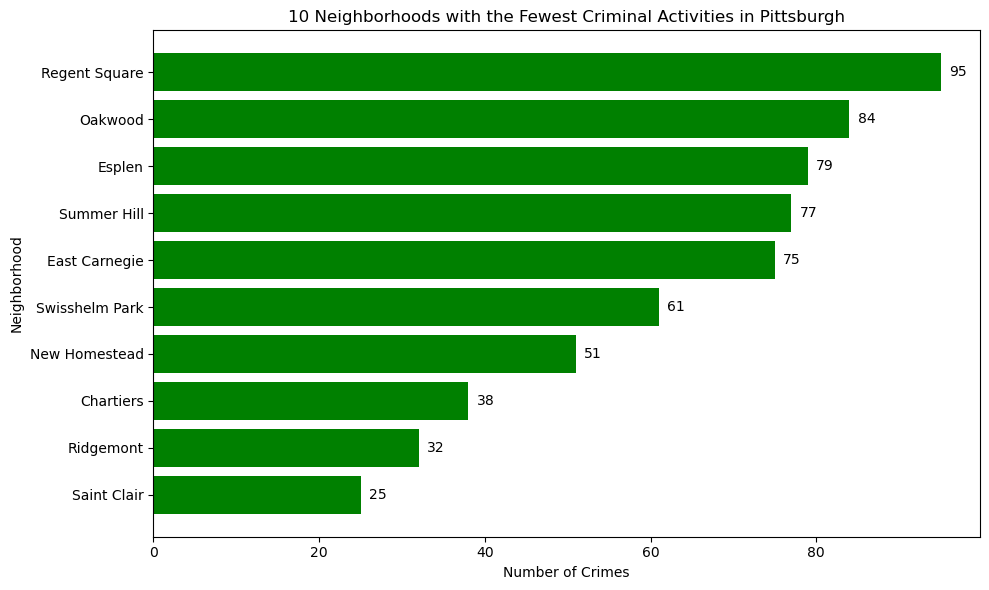

In [12]:
bottom_10 = crime_by_neighborhood.head(10)

plt.figure(figsize=(10,6))
plt.barh(bottom_10['Neighborhood'], bottom_10['Crime_Count'], color='green')
plt.title('10 Neighborhoods with the Fewest Criminal Activities in Pittsburgh')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')

for index, value in enumerate(bottom_10['Crime_Count']):
    plt.text(value + 1, index, str(value), va='center')

plt.tight_layout()
plt.show()

# Police arrests

In [13]:
arrests_df = pd.read_csv('policearrest.csv')
print('Preview of dataset:')
display(arrests_df.head())
print("Total Police arrests:", len(arrests_df))

Preview of dataset:


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...


Total Police arrests: 32674


In [14]:
arrests_df = arrests_df.dropna(subset=['Neighborhood'])
violent_crimes = [
    "Assault Offenses",
    "Robbery",
    "Homicide Offenses",
    "Kidnapping/Abduction",
    "Sex Offenses"
]

violent_df = arrests_df[arrests_df['NIBRS_Offense_Category'].isin(violent_crimes)]

print("Total violent crime arrests:", len(violent_df))
violent_df.head()

Total violent crime arrests: 6144


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
10,11,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 5104 Resisting Arrest,Zone 3,2904.0,Carrick,MISDEMEANOR - M2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
11,12,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 2702 A3 Aggravated Assault-Injury To Police...,Zone 3,2904.0,Carrick,FELONY - F2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
13,14,Adult Arrest-On View,PGHP25000021,e8087412-48b6-c2f7-f546-08dd2a3a91ae,2025-01-01,2025.0,Jan,03:01,On-View Arrest (apprehension without a warrant...,41.0,...,Person,A,18 2701 A1 Simple Assault-General,Zone 3,1921.0,Southshore,MISDEMEANOR - M2,-80.0070,40.435,NaN
19,20,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,"18 2701 B1 Simple Assault - Mutual Combatants,...",Zone 5,1208.0,Larimer,MISDEMEANOR - M3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"
20,21,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,18 2702.1 A2 Assault of Law Enforcement Office...,Zone 5,1208.0,Larimer,FELONY - F3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"


In [15]:
violent_counts = violent_df['Neighborhood'].value_counts().reset_index()
violent_counts.columns = ['Neighborhood', 'Violent_Arrest_Count']

violent_counts = violent_counts.sort_values(by='Violent_Arrest_Count', ascending=True)

violent_counts.head(10)


,Neighborhood,Violent_Arrest_Count
89,Swisshelm Park,1
88,Ridgemont,2
87,Saint Clair,5
86,Chartiers,7
83,East Carnegie,8
84,Allegheny West,8
85,Oakwood,8
81,Polish Hill,9
82,Friendship,9
79,Summer Hill,10


In [16]:
most_peaceful = violent_counts.iloc[0]

print(f" The most peaceful neighborhood in Pittsburgh is **{most_peaceful['Neighborhood']}**, "
      f"with only {most_peaceful['Violent_Arrest_Count']} violent crime arrests recorded.")


 The most peaceful neighborhood in Pittsburgh is **Swisshelm Park**, with only 1 violent crime arrests recorded.


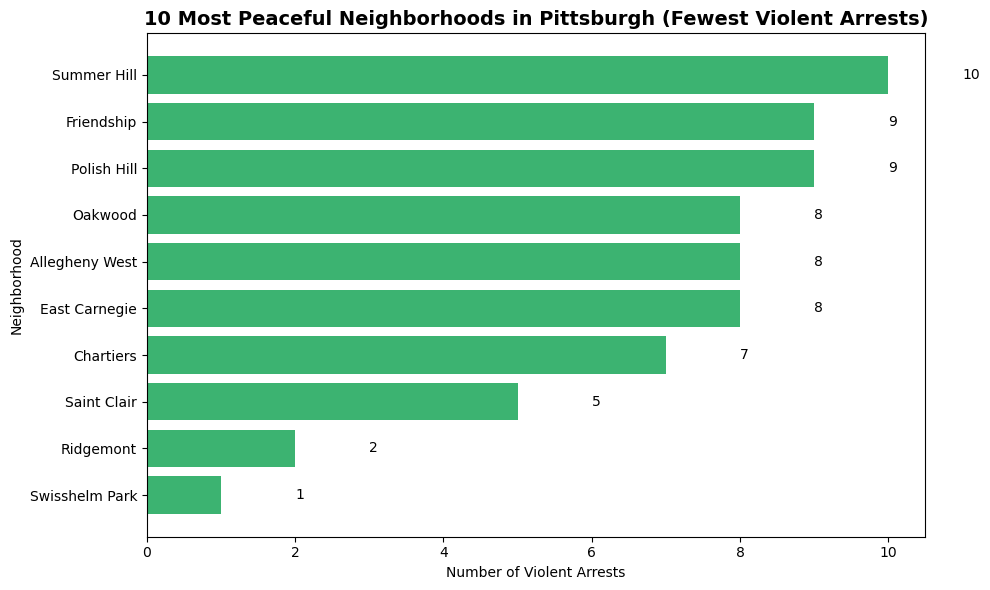

In [17]:
bottom_10 = violent_counts.head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(bottom_10['Neighborhood'], bottom_10['Violent_Arrest_Count'], color='mediumseagreen')

plt.title('10 Most Peaceful Neighborhoods in Pittsburgh (Fewest Violent Arrests)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Violent Arrests')
plt.ylabel('Neighborhood')


for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())}", va='center')

plt.tight_layout()
plt.show()


# Weapon Seizures

In [18]:
WTake = pd.read_csv("Weaponseizure.csv")
WTake.head(15)

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
5,6,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2015,1,0,Westwood,2.0,28.0,4.200356e+10,5.0,6,1-18,40.435984,-80.052042
6,7,"400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232",1,0,1,0,0,0,2015,1,1,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.466771,-79.928240
7,8,"5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201",2,0,2,0,0,0,2015,1,1,Upper Lawrenceville,7.0,10.0,4.200310e+10,2.0,2,3-5,40.480147,-79.954014
8,9,"1100 BLOCK GRAND AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,1,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,1,1-14,40.474986,-80.027528
9,10,"1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216",1,0,1,0,0,0,2015,1,1,Beechview,4.0,19.0,4.200319e+10,5.0,6,4-28,40.410487,-80.023969


In [19]:
filtered_WTake = WTake[(WTake['year'] >= 2020) & (WTake['year'] <= 2025)].copy()

selected_columns = [
    'year', 
    'neighborhood', 
    'total_count', 
    'pistol_count', 
    'revolver_count', 
    'rifle_count', 
    'shotgun_count',
    'other_count'
]
final_WTake = filtered_WTake[selected_columns]
missing_count = final_WTake['neighborhood'].isna().sum()

print("First 10 incidents (2020-2025) with only selected columns:")
print(final_WTake.head(15))

total_incidents = len(final_WTake)
print(f"\nso far, total number of incidents between 2020 and 2025 is: {total_incidents}")
print(f"And we could not identify the neighborhoods of: {missing_count}")

First 10 incidents (2020-2025) with only selected columns:
      year           neighborhood  total_count  pistol_count  revolver_count  \
2911  2020                    NaN            3             3               0   
2912  2020                    NaN            1             1               0   
2913  2020         Homewood South            1             1               0   
2914  2020              Brookline            1             0               1   
2915  2020                    NaN            1             1               0   
2916  2020                    NaN            1             1               0   
2917  2020                    NaN            1             0               1   
2918  2020                    NaN            1             1               0   
2919  2020              Overbrook            1             1               0   
2920  2020                    NaN            1             1               0   
2921  2020           East Liberty            1             1 

In [20]:
bottom_10_weapons = filtered_WTake.groupby('neighborhood')['total_count'].sum().sort_values(ascending=True).head(10)
bottom_10_WTake = bottom_10_weapons.reset_index()
bottom_10_WTake.columns = ['neighborhood', 'Total Weapons Taken (2020-2025)']

print("Bottom 10 Neighborhoods by Total Weapons Taken (2020-2025):")
print(bottom_10_WTake)

Bottom 10 Neighborhoods by Total Weapons Taken (2020-2025):
           neighborhood  Total Weapons Taken (2020-2025)
0        Allegheny West                                1
1               Bon Air                                1
2        Chartiers City                                1
3         Regent Square                                1
4          West Oakland                                1
5         Spring Garden                                1
6               Oakwood                                2
7  Mount Oliver Borough                                2
8           Polish Hill                                2
9             Fairywood                                2


In [21]:
bottom_10_neighborhoods = [
    'Allegheny West', 'West Oakland', 'Chartiers City', 'Regent Square', 'Bon Air', 
    'Spring Garden', 'Polish Hill', 'Mount Oliver Borough', 'Mt. Oliver', 'Oakwood'
]

bottom_10_data = filtered_WTake[filtered_WTake['neighborhood'].isin(bottom_10_neighborhoods)].copy()
weapon_breakdown = bottom_10_data.groupby('neighborhood').sum().reset_index()


weights = {
    'revolver_count': 1,  # Least Bad
    'pistol_count': 2,
    'shotgun_count': 3,
    'rifle_count': 4,
    'other_count': 5      # Worst
}


weapon_breakdown['Severity_Score'] = (
    weapon_breakdown['revolver_count'] * weights['revolver_count'] +
    weapon_breakdown['pistol_count'] * weights['pistol_count'] +
    weapon_breakdown['shotgun_count'] * weights['shotgun_count'] +
    weapon_breakdown['rifle_count'] * weights['rifle_count'] +
    weapon_breakdown['other_count'] * weights['other_count']
)


ranked_WTake = weapon_breakdown.sort_values(by='Severity_Score', ascending=True).reset_index(drop=True)


final_ranked_WTake = ranked_WTake[[
    'neighborhood', 
    'Severity_Score',
    'revolver_count', 
    'pistol_count', 
    'shotgun_count', 
    'rifle_count', 
    'other_count',
    'total_count'
]]

final_ranked_WTake.columns = [
    'Neighborhood', 
    'Severity Score (Weighted)',
    'Revolver Count (x1)', 
    'Pistol Count (x2)', 
    'Shotgun Count (x3)', 
    'Rifle Count (x4)', 
    'Other Count (x5)',
    'Total Weapons Taken'
]

print("Bottom 10 Neighborhoods Re-Ranked by Weapon Severity (2020-2025):")
print(final_ranked_WTake)

Bottom 10 Neighborhoods Re-Ranked by Weapon Severity (2020-2025):
           Neighborhood  Severity Score (Weighted)  Revolver Count (x1)  \
0        Chartiers City                          1                    1   
1        Allegheny West                          2                    0   
2          West Oakland                          2                    0   
3         Spring Garden                          3                    0   
4           Polish Hill                          4                    0   
5            Mt. Oliver                          4                    0   
6               Oakwood                          4                    0   
7               Bon Air                          5                    0   
8         Regent Square                          5                    0   
9  Mount Oliver Borough                          6                    0   

   Pistol Count (x2)  Shotgun Count (x3)  Rifle Count (x4)  Other Count (x5)  \
0                  0        

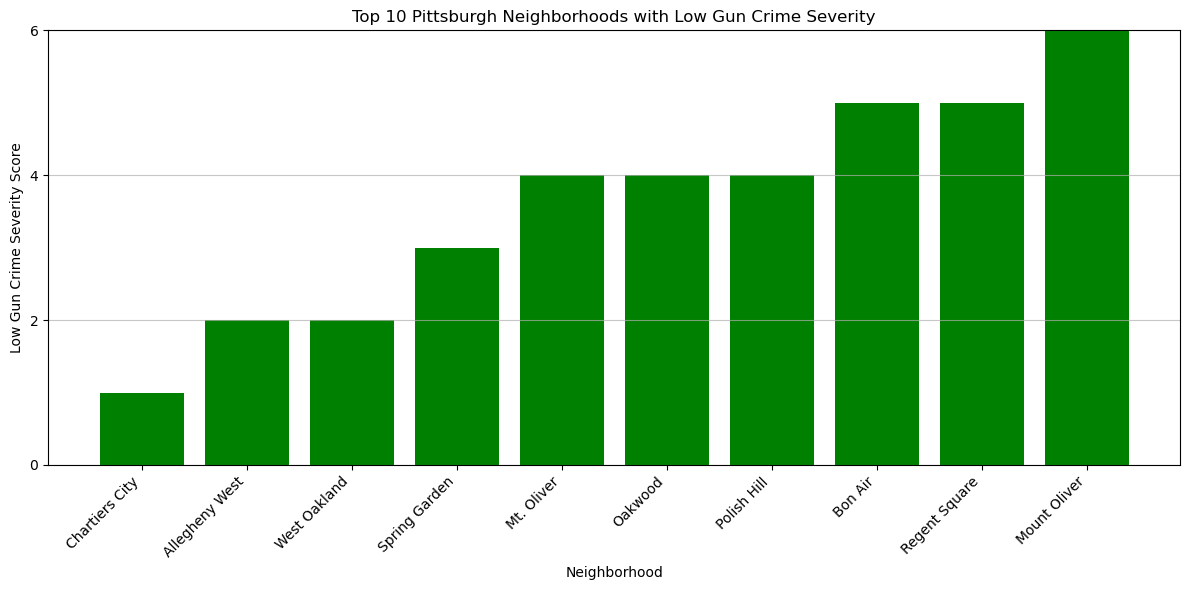

In [22]:
neighborhoods = [
    'Chartiers City',
    'Allegheny West',
    'West Oakland',
    'Spring Garden',
    'Mt. Oliver',
    'Oakwood',
    'Polish Hill',
    'Bon Air',
    'Regent Square',
    'Mount Oliver'
]

severity_scores = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6]

plt.figure(figsize=(12, 6))


plt.bar(neighborhoods, severity_scores, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Low Gun Crime Severity Score')
plt.title('Top 10 Pittsburgh Neighborhoods with Low Gun Crime Severity')
plt.yticks(range(0, 7, 2))
plt.ylim(0, 6)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()


plt.show()

In [23]:

crime_by_neighborhood.columns = crime_by_neighborhood.columns.str.strip().str.title()
violent_counts.columns = violent_counts.columns.str.strip().str.title()
weapon_breakdown.columns = weapon_breakdown.columns.str.strip().str.title()


In [35]:

combined = (
    crime_by_neighborhood
    .merge(violent_counts, on='Neighborhood', how='inner')
    .merge(weapon_breakdown, on='Neighborhood', how='inner')
)

combined.head()



,Neighborhood,Crime_Count,Violent_Arrest_Count,_Id,Address,Total_Count,Other_Count,Pistol_Count,Revolver_Count,Rifle_Count,...,Dow,Council_District,Ward,Tract,Public_Works_Division,Police_Zone,Fire_Zone,Latitude,Longitude,Severity_Score
0,Oakwood,84,8,8979,"100 BLOCK BALDWICK RD PITTSBURGH, PA 152052400...",2,0,2,0,0,...,9,4.0,56.0,8.400713e+10,10.0,66,1-191-19,80.854663,-160.122069,4
1,Allegheny West,125,8,4601,"800 BLOCK ALLEGHENY AVE PITTSBURGH, PA 15233",1,0,1,0,0,...,2,1.0,22.0,4.200356e+10,1.0,1,1-7,40.450935,-80.018404,2
2,Spring Garden,151,20,4739,"1700 BLOCK HAUG ST PITTSBURGH, PA 15212",1,0,0,0,0,...,3,1.0,26.0,4.200324e+10,1.0,1,1-11,40.466971,-79.986313,3
3,Polish Hill,192,9,9283,"1000 BLOCK HERRON AVE PITTSBURGH, PA 15219300 ...",2,0,2,0,0,...,8,14.0,12.0,8.400612e+10,12.0,22,2-62-6,80.914830,-159.933961,4
4,Bon Air,207,11,5297,"100 BLOCK REIFERT ST PITTSBURGH, PA 15210",1,1,0,0,0,...,1,4.0,18.0,4.200356e+10,5.0,3,4-7,40.409081,-79.998125,5


In [40]:
import numpy as np

combined['Crime_Score'] = 1 - (combined['Crime_Count'] - combined['Crime_Count'].min()) / (combined['Crime_Count'].max() - combined['Crime_Count'].min())
combined['Violent_Score'] = 1 - (combined['Violent_Arrest_Count'] - combined['Violent_Arrest_Count'].min()) / (combined['Violent_Arrest_Count'].max() - combined['Violent_Arrest_Count'].min())
combined['Weapon_Score'] = 1 - (combined['Severity_Score'] - combined['Severity_Score'].min()) / (combined['Severity_Score'].max() - combined['Severity_Score'].min())

combined['Final_Safety_Score'] = (
    0.4 * combined['Crime_Score'] +
    0.4 * combined['Violent_Score'] +
    0.2 * combined['Weapon_Score']
)

best_neighborhoods = combined.sort_values(by='Final_Safety_Score', ascending=False).reset_index(drop=True)

print("🏡 Top 10 Safest Neighborhoods in Pittsburgh:")
print(best_neighborhoods[['Neighborhood', 'Final_Safety_Score']].head(10))


🏡 Top 10 Safest Neighborhoods in Pittsburgh:
     Neighborhood  Final_Safety_Score
0  Allegheny West            0.925792
1         Oakwood            0.866667
2   Spring Garden            0.670890
3     Polish Hill            0.659427
4         Bon Air            0.542081
5    West Oakland            0.200000


/scratch/slurm-22234/ipykernel_3313361/832780421.py:12: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


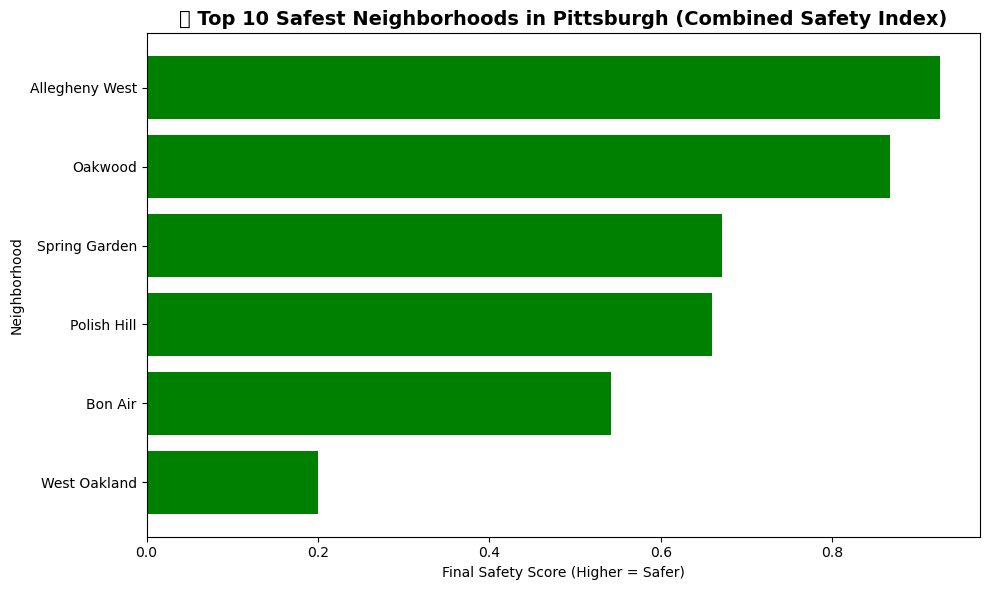

In [54]:
import matplotlib.pyplot as plt

# Sort by final safety score (higher = safer)
top10 = combined.sort_values(by='Final_Safety_Score', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top10['Neighborhood'], top10['Final_Safety_Score'], color='green')
plt.title('🏆 Top 10 Safest Neighborhoods in Pittsburgh (Combined Safety Index)', fontsize=14, weight='bold')
plt.xlabel('Final Safety Score (Higher = Safer)')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis()  # so top is the safest
plt.tight_layout()
plt.show()


In [56]:
top10_display = top10[['Neighborhood', 'Crime_Count', 'Violent_Arrest_Count', 'Severity_Score', 'Final_Safety_Score']]
top10_display.style.background_gradient(subset=['Final_Safety_Score'], cmap='Greens').set_caption("🏆 Pittsburgh’s Top 10 Safest Neighborhoods")


,Neighborhood,Crime_Count,Violent_Arrest_Count,Severity_Score,Final_Safety_Score
1,Allegheny West,125,8,2,0.925792
0,Oakwood,84,8,4,0.866667
2,Spring Garden,151,20,3,0.670890
3,Polish Hill,192,9,4,0.659427
4,Bon Air,207,11,5,0.542081
5,West Oakland,305,42,2,0.200000
